# Задача выбора региона разработки новой скважины для «ГлавРосГосНефть»

***
### Задача:

Нужно решить, где бурить новую скважину. Предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль. Возможную прибыль и риски проанализировать техникой Bootstrap.
    
Данные геологоразведки трёх регионов находятся в файлах: 
* geo_data_0.csv
* geo_data_1.csv
* geo_data_2.csv

### Условия задачи:

* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

### Шаги для выбора локации:

* В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
* Строят модель для предсказания объёма запасов в новых скважинах;
* Выбирают скважины с самыми высокими оценками значений;
* Определяют регион с максимальной суммарной прибылью отобранных скважин.

<br/>

***

### План работы:

**[Шаг 1.](#section_1)** Загрузка  и подготовка данных.

**[Шаг 2.](#section_2)** Обучение и проверка моделей для каждого региона.

**[Шаг 3.](#section_3)** Расчет рисков и прибыли с использованием техники Bootsrap.

**[Шаг 4.](#section_4)** Общий вывод.

<br/>


<a id='section_1'></a>
### Шаг 1. Загрузка  и подготовка данных

#### 1.1 Загрузка данных и изучение общей информации

In [1]:
#Загрузка необходимых библиотек:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
#Сохраняем данные в датафреймы
geo_df0 = pd.read_csv('C:/Users/ratus/DATA_SCIENCE/итоговые проекты/6/geo_data_0.csv')
geo_df1 = pd.read_csv('C:/Users/ratus/DATA_SCIENCE/итоговые проекты/6/geo_data_1.csv')
geo_df2 = pd.read_csv('C:/Users/ratus/DATA_SCIENCE/итоговые проекты/6/geo_data_2.csv')

In [3]:
#Общая информация по датафрейму 
#и несколько строк
geo_df0.info()
print (display(geo_df0.sample(5)))

geo_df1.info()
print (display(geo_df1.sample(5)))

geo_df2.info()
print (display(geo_df2.sample(5)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
44415,Icq3a,1.636574,-0.348628,5.749081,97.181974
25908,RGh5n,1.950917,0.180160,-5.387421,77.143233
61655,de3rb,-0.957790,0.132213,-0.567556,37.691845
42997,2gWWv,0.326982,-0.289088,8.544554,173.819654
33611,jkqY7,0.972915,0.542088,3.646131,82.640558


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
89266,TS254,15.816840,7.239999,2.993137,80.859783
96504,XgMlY,4.056185,-7.591975,2.994835,84.038886
92114,oHTYT,-10.993069,-2.228556,1.001428,30.132364
87688,rA9yJ,-7.538906,2.749226,4.009347,110.992147
81098,IBBe8,-3.602628,-11.152695,1.998295,57.085625


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
16639,VPLII,-0.102090,-0.758870,-0.233399,34.072291
84280,tCSqh,-1.163470,0.088874,11.427271,154.195387
7290,FJM0C,-1.403451,-4.074008,1.689972,107.385593
74334,a0Qp9,-3.112595,-1.599712,0.237200,75.364797
1144,V0GH7,1.938873,1.908151,-0.360483,86.186085


None


В каждом из трех регионов у нас содержится информация о 100тыс скважинах. 

Пропусков в датафреймах нет.

С типами данных все в порядке.

Названия столбцов соответствуют стилю snake_case.

Признак `id` перед моделированием можно удалить, он не влияет на наш целевой признак `product` (идентификатор скважины не влияет на объем запасов).

Посмотрим данные на наличие аномальностей и выбросов:

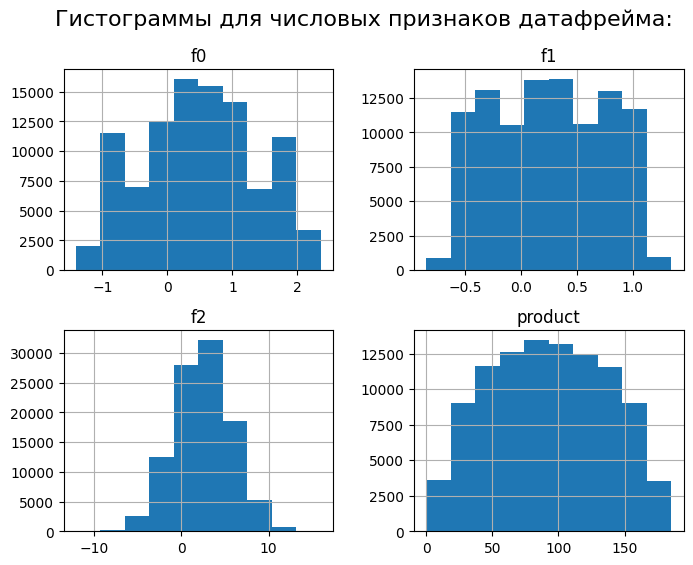

In [4]:
# Общая гистограмма для всех числовых столбцов
geo_df0.hist(figsize=(8, 6))
plt.suptitle('Гистограммы для числовых признаков датафрейма:', fontsize=16);

Аномальных данных и выбросов по датафрейму первого региона нет.

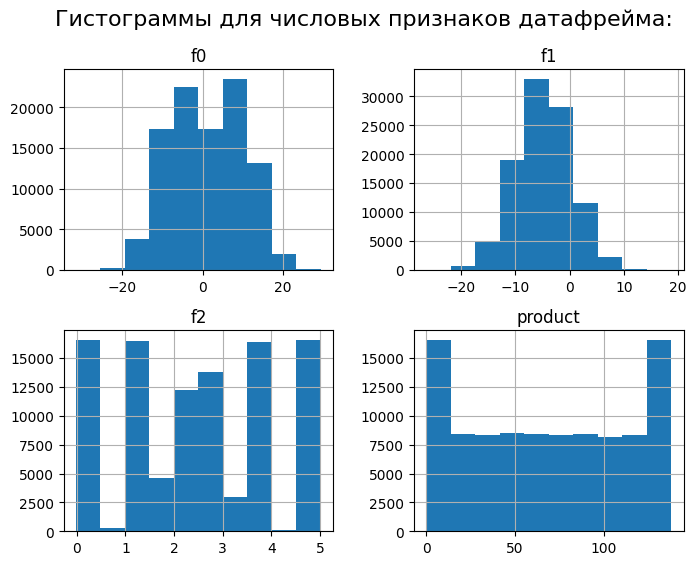

In [5]:
# Общая гистограмма для всех числовых столбцов
geo_df1.hist(figsize=(8, 6))
plt.suptitle('Гистограммы для числовых признаков датафрейма:', fontsize=16);

Аномальных данных и выбросов по датафрейму второго региона нет. Только вот картина распределения значений очень сильно отличается от первого региона, и есть провалы и скачки, но это мы еще поисследуем далее.

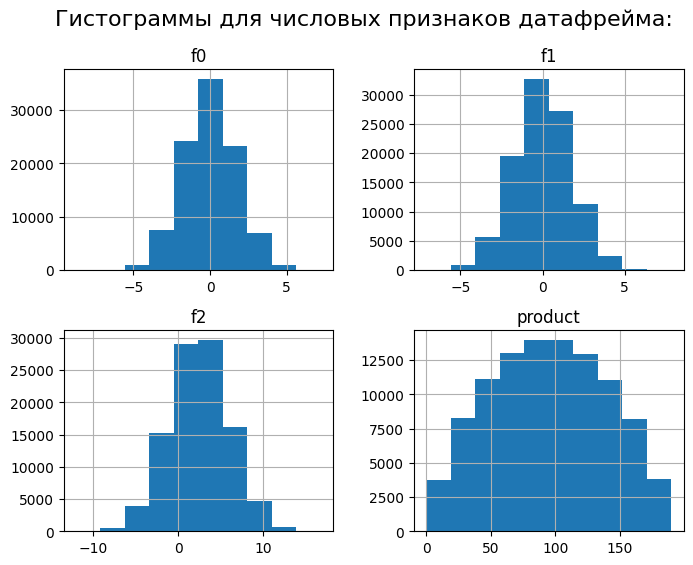

In [6]:
# Общая гистограмма для всех числовых столбцов
geo_df2.hist(figsize=(8, 6))
plt.suptitle('Гистограммы для числовых признаков датафрейма:', fontsize=16);

Аномальных данных и выбросов по датафрейму третьего региона нет.

Также по всем регионам заметен разный масштаб численных признаков, необходимо будет провести масштабирование перед обучением моделей.

#### 1.2 Подготовка данных. Проверка на наличие дубликатов

In [7]:
#Ищем дубликаты по всему датафрейму
print (geo_df0.duplicated().sum())
print (geo_df1.duplicated().sum())
print (geo_df2.duplicated().sum())

0
0
0


В датафреймах трех регионов дубликатов строк не обнаружено.

Посмотрим есть ли дубликаты по скважинам в каждом регионе:

In [8]:
def duplicated_rows (df):
    
    #Ищем дубликаты по параметрам
    id = df[df.duplicated(['id'])].id
    print ('Кол-во id дубликатов в датафрейме = ', len(id))

    #Посмотрим на эти строки:
    duplicated_rows = df.query('id in @id')
    
    return duplicated_rows

In [9]:
duplicated_rows_df0 = duplicated_rows(geo_df0)
duplicated_rows_df0

Кол-во id дубликатов в датафрейме =  10


,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


В первом регионе есть 10 дублирующих строк по скважине. 
Идей и вариантов логики, по которой бы вычислять оставить ту или иную строку нет. И так как дублирующих строк немного, удалим их вовсе из датафрейма:

In [10]:
geo_df0.drop(duplicated_rows_df0.index, inplace = True)

#Обновим индексацию датафрейма
geo_df0.reset_index(drop=True, inplace= True)

#Проверяем
geo_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99980 entries, 0 to 99979
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99980 non-null  object 
 1   f0       99980 non-null  float64
 2   f1       99980 non-null  float64
 3   f2       99980 non-null  float64
 4   product  99980 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Посмотрим для второго региона:

In [11]:
duplicated_rows_df1 = duplicated_rows(geo_df1)
duplicated_rows_df1

Кол-во id дубликатов в датафрейме =  4


,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


Во втором регионе есть 4 дублирующие строки по скважине. Аналогично как и в первом регионе удалим их вовсе из датафрейма:

In [12]:
geo_df1.drop(duplicated_rows_df1.index, inplace = True)

#Обновим индексацию датафрейма
geo_df1.reset_index(drop=True, inplace= True)

#Проверяем
geo_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


То же самое проделаем для третьего региона:

In [13]:
duplicated_rows_df2 = duplicated_rows(geo_df2)
duplicated_rows_df2

Кол-во id дубликатов в датафрейме =  4


,id,f0,f1,f2,product
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


Удаляем дублирущие по скважине строки из датафрейма:

In [14]:
geo_df2.drop(duplicated_rows_df2.index, inplace = True)

#Обновим индексацию датафрейма
geo_df2.reset_index(drop=True, inplace= True)

#Проверяем
geo_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


#### 1.3 Подготовка данных. Удаление признака `id`:

In [15]:
del geo_df0['id']

#Проверяем
geo_df0.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [16]:
del geo_df1['id']

#Проверяем
geo_df1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [17]:
del geo_df2['id']

#Проверяем
geo_df2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


#### Ввывод по итогу шага 1:

* По каждому из трех регионов получена информация о 100тыс скважинах. Пропусков в датафреймах нет. С типами данных все в порядке.

* Аномальных данных и выбросов в датафреймах нет. 

* По всем регионам заметен разный масштаб численных признаков, необходимо будет провести масштабирование перед обучением моделей.

* Полностью дублирующих строк в датафреймах найдено не было. Однако были дубликаты информации по скважинам. Дублирующие строки были удалены в количестве 20 строк для первого региона и по 8 строк во втором и третьем регионе.

* Из последующего моделирования был удален признак `id` (идентификатор скважины). Он является для нашей задачи лишним, так как от него не зависит целевой показатель объема добычи.

* Признаки во всех датасетах к конце данного шага - численные. Категориальных признаков нет.

<a id='section_2'></a>
### Шаг 2. Обучение и проверка моделей для каждого региона.

#### 2.1. Разделим данные на обучающую (75%) и валидационную (25%) выборки:

In [18]:
def split(df, target,percent = 0.25):
    """
    Функция для разделения на выборки
    В качестве аргументов принимает датафрейм,
    целевой признак и процент для разделения.
    Возвращает обучающую и валидационную выборки 
    для общего набора признаков и для целевого признака
    """
    
    features = df.drop([target] , axis=1)
    target = df[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=percent, random_state=123)
    
    return features_train, features_valid, target_train, target_valid

In [19]:
#Разделим три наших датафрейма на обучающие и валидационные выборки:
features_train_0, features_valid_0, \
target_train_0, target_valid_0 = split(geo_df0, 'product', 0.25)

features_train_1, features_valid_1, \
target_train_1, target_valid_1 = split(geo_df1, 'product', 0.25)

features_train_2, features_valid_2, \
target_train_2, target_valid_2 = split(geo_df2, 'product', 0.25)

#### 2.2. Отмасштабируем признаки:

In [20]:
def standartize(features_train, features_valid, numeric):
    """
    Функция для масштабирования числовых признаков
    Принимает на вход список признаков трейновой и 
    валидационной выборки, а также список числовых признаков.
    Возвращает преобразованные выборки
    """

    #Создадим объект структуры стандартизации StandardScaler 
    # и настроим его на обучающих данных
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])

    #Преобразуем обучающую,валидационную и тестовые выборки
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])

    #Для игнора предупреждения SettingWithCopy
    pd.options.mode.chained_assignment = None
    
    return (features_train, features_valid)

In [21]:
#Все числовые признаки
numeric = ['f0', 'f1', 'f2']
    
#Проводим масштабирование для датафрейма первого региона
features_train_0, features_valid_0 = standartize(features_train_0, features_valid_0, numeric)

#Проводим масштабирование для датафрейма 2 региона
features_train_1, features_valid_1 = standartize(features_train_1, features_valid_1, numeric)

#Проводим масштабирование для датафрейма 3 региона
features_train_2, features_valid_2 = standartize(features_train_2, features_valid_2, numeric)

#### 2.2. Обучим модели, сделаем предсказания на валидационной выборке и проанализируем:

In [22]:
def modelling (features_train,target_train, features_valid, target_valid):
    """
    Функция для создания, обучения и предсказаний модели по региону
    На вход принимает обучающую и валиадционную выборки признаков
    По итогу возвращает RMSE, и датафрейм с предсказанными 
    и реальными запасами сырья
    """
    #Создаем модель
    model = LinearRegression()
    #Обучаем
    model.fit(features_train,target_train)
    
    #Делаем предсказание
    predicted_valid = model.predict(features_valid)
    
    #ошибка RMSE
    rmse = mean_squared_error(target_valid, predicted_valid, squared=False)
    
    #Сохраним в отдельный датафрейм предсказания 
    #и реальные значения
    data = pd.DataFrame()
    data['predicted_valid'] = predicted_valid
    data['target_valid'] = target_valid.values

    return (rmse, data )

Для первого региона:

In [23]:
rmse_0, data_0 = modelling (
    features_train_0,target_train_0, features_valid_0, target_valid_0)

#Выводим ошибку RMSE
print("RMSE = {0:.2f}.". format(rmse_0))
    
# Средний запас предсказанного сырья:  
print("Средний запас предсказанного сырья: {0:.2f} тыс. баррелей.". \
          format(data_0['predicted_valid'].mean()))

RMSE = 37.56.
Средний запас предсказанного сырья: 92.73 тыс. баррелей.


In [24]:
data_0

,predicted_valid,target_valid
0,61.061802,41.952961
1,122.561326,158.680125
2,99.491331,113.869258
3,83.164655,66.151542
4,65.442253,40.762255
...,...,...
24990,93.791604,39.946752
24991,104.258902,63.715107
24992,59.662626,106.175821
24993,68.129677,73.316689


Ошибка RMSE велика. Посмотрим на графике разницу предсказанного и истинных значений:

In [25]:
def plot_t_and_p(target_valid, predicted_valid):
    """
    Функция для построения графиков истинных и предсказаных значений
    На вход принимает выборку целевых валидационных значений
    и выборку предсказаний на валидационных данных
    """
    plt.title('Истинные значения в регионе')
    target_valid.plot.hist( 
        color='pink', 
        bins = 200)
    plt.show()

    plt.title('Предсказанные значения в регионе')
    predicted_valid.plot.hist(  
        bins = 200)


    plt.figure(figsize = (12,5))
    predicted_valid.plot.hist( 
        label='предсказанные значения', 
        color='pink', 
        bins = 200)

    target_valid.plot.hist( 
        label='истинные значения',
        bins = 200)

    plt.title('Общий график предсказанного и истинных значений в регионе')
    plt.xlabel('объемы сырья')
    plt.ylabel('количество')
    plt.legend();


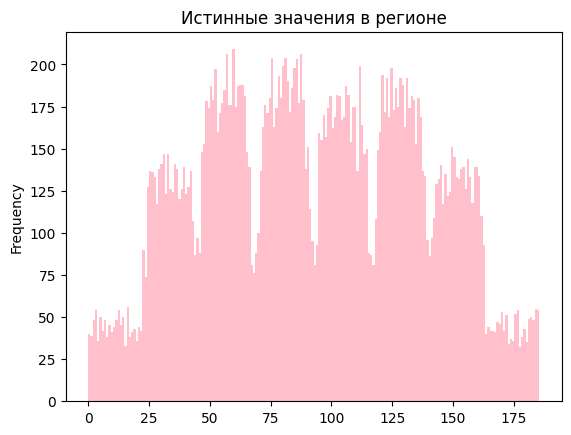

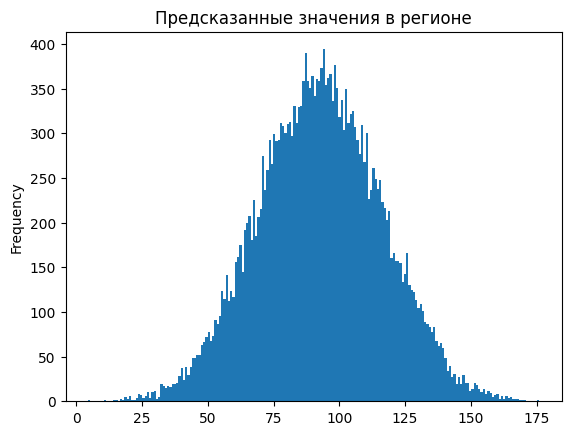

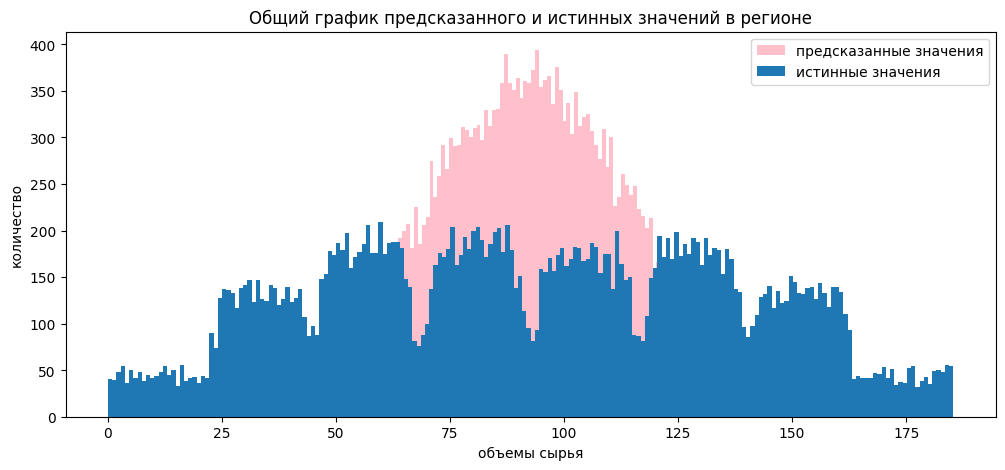

In [26]:
plot_t_and_p(data_0['target_valid'], data_0['predicted_valid'])

Мы имеем дело с плохими предсказаниями.

Для второго региона:

In [27]:
rmse_1, data_1 = modelling (
    features_train_1,target_train_1, features_valid_1, target_valid_1)

#Выводим ошибку RMSE
print("RMSE = {0:.2f}.". format(rmse_1))
    
# Средний запас предсказанного сырья:  
print("Средний запас предсказанного сырья: {0:.2f} тыс. баррелей.". \
          format(data_1['predicted_valid'].mean()))

RMSE = 0.89.
Средний запас предсказанного сырья: 68.61 тыс. баррелей.


In [28]:
data_1

,predicted_valid,target_valid
0,81.365715,80.859783
1,54.258162,53.906522
2,111.680218,110.992147
3,82.281323,80.859783
4,82.170179,80.859783
...,...,...
24993,29.929206,30.132364
24994,3.281711,3.179103
24995,111.020592,110.992147
24996,55.147530,53.906522


Для второго региона RMSE кажется хорошей. Посмотрим на графики истинного и предсказанных значений:

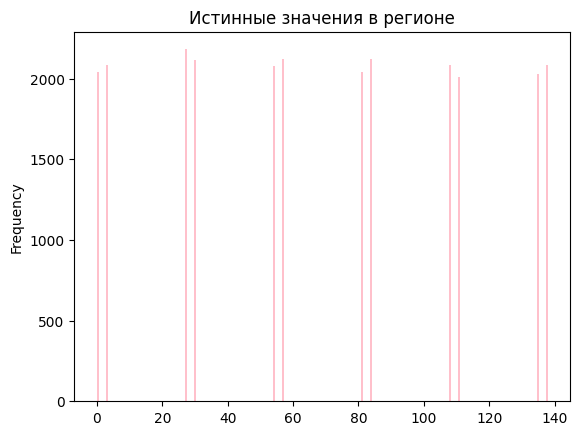

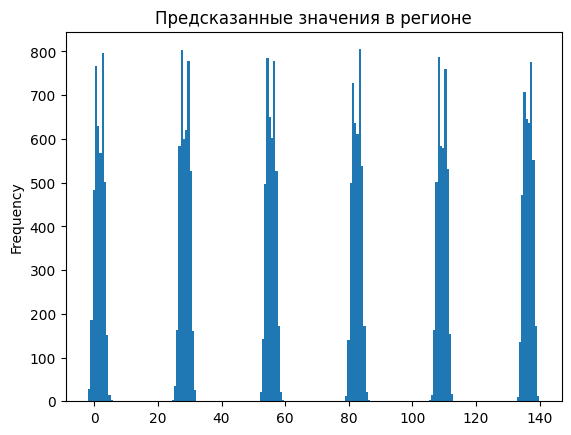

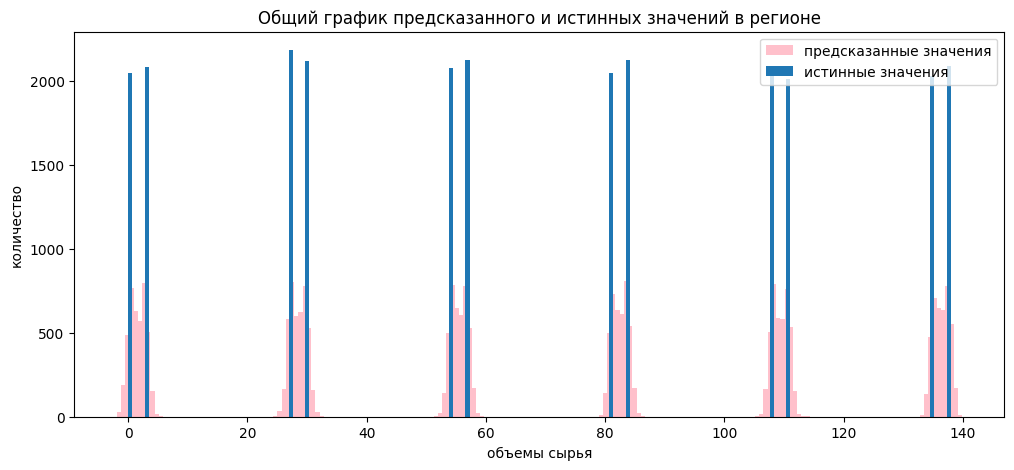

In [29]:
plot_t_and_p(data_1['target_valid'], data_1['predicted_valid'])

Есть небольшое ощущение что модель переобучилась, и поэтому выдает такую метрику и результаты

Для третьего региона:

In [30]:
rmse_2, data_2 = modelling (
    features_train_2,target_train_2, features_valid_2, target_valid_2)

#Выводим ошибку RMSE
print("RMSE = {0:.2f}.". format(rmse_2))
    
# Средний запас предсказанного сырья:  
print("Предсказанный средний запас сырья: {0:.2f} тыс. баррелей.". \
          format(data_2['predicted_valid'].mean()))

RMSE = 39.94.
Предсказанный средний запас сырья: 95.00 тыс. баррелей.


In [31]:
data_2

,predicted_valid,target_valid
0,107.406755,127.618170
1,117.799909,123.942754
2,93.151162,98.878081
3,80.607860,117.155357
4,89.145197,82.659919
...,...,...
24993,93.437424,48.814291
24994,68.272990,152.196856
24995,84.327229,137.501887
24996,96.857437,126.610991


Для третьего региона аналогичено первому региону RMSE очень велика. Посмотрим на графики предсказанных и истинных значений:

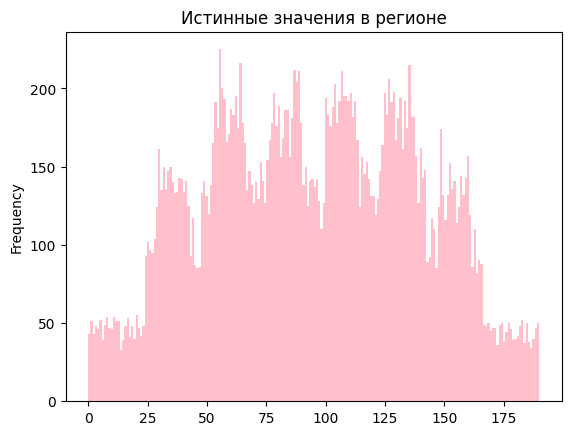

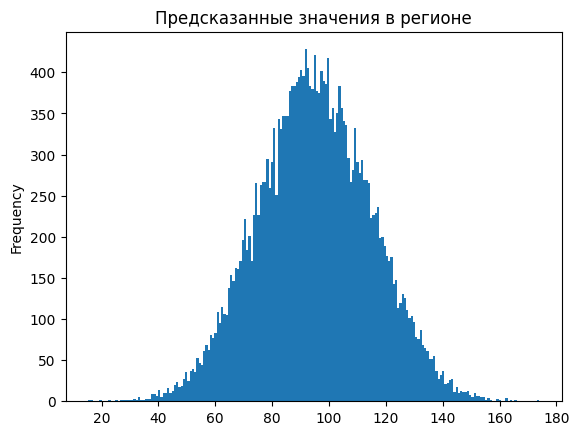

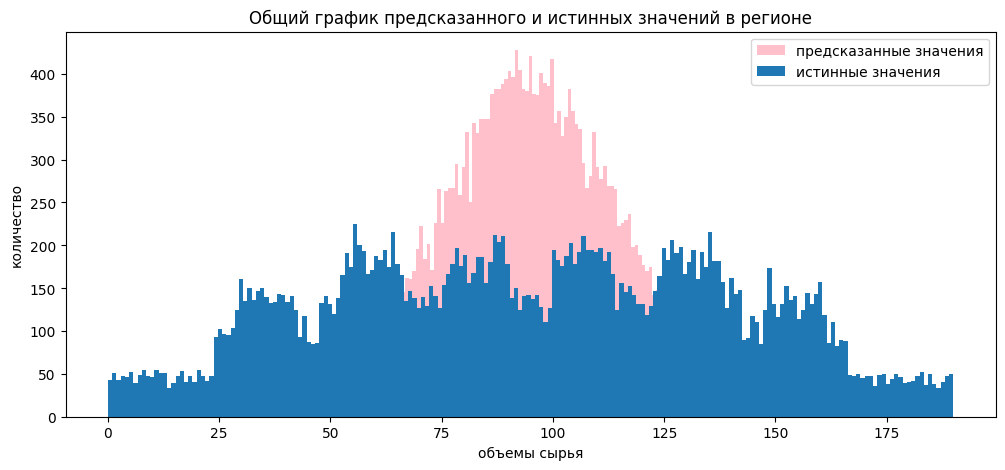

In [32]:
plot_t_and_p(data_2['target_valid'], data_2['predicted_valid'])

#### Вывод по итогу шага 2:

* Данные были разделены на обучающую (75%) и валидационную(25%) выборки.
* Числовые признаки были стандартизированы

* Для первого региона RMSE модели составило 37.56, средний запас предсказанного сырья 92.73 тыс. баррелей.
* Для второго региона RMSE модели составило 0.89, средний запас предсказанного сырья 68.61 тыс. баррелей.
* Для третьего региона RMSE модели составило 39.94, средний запас предсказанного сырья 95.00 тыс. баррелей.

Результаты предсказаний моделей для первого и третьего региона очень плохи, а для второго похоже на то, что модель переобучена.

<a id='section_3'></a>
### Шаг 3. Расчет рисков и прибыли с использованием техники Bootsrap

#### Шаг 3.1. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [33]:
#Бюджет на разработку скважин
BUDGET = 10e+9

#Доход с каждой единицы продукта
#(с каждой тысячи баррель)
PRICE = 450000

#кол-во исследуемых точек
COUNT_POINTS = 500

#Кол-во лучших, которые берутся в разработку
BEST_POINTS = 200

 Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины:

In [34]:
print ('Достаточный объем сырья для безубыточности = \
{0:.2f} тыс. баррелей'.format(BUDGET/BEST_POINTS/PRICE))

Достаточный объем сырья для безубыточности = 111.11 тыс. баррелей


Сравним полученный объём сырья со средним запасом в каждом регионе:

In [35]:
print(f"Средний фактический запас в регионе 1 = \
{geo_df0['product'].mean():.2f} тыс. баррелей")
print (f"Средний фактический запас в регионе 2 = \
{geo_df1['product'].mean():.2f} тыс. баррелей")
print (f"Средний фактический запас в регионе 3 = \
{geo_df2['product'].mean():.2f} тыс. баррелей")

Средний фактический запас в регионе 1 = 92.50 тыс. баррелей
Средний фактический запас в регионе 2 = 68.82 тыс. баррелей
Средний фактический запас в регионе 3 = 95.00 тыс. баррелей


Напомним что средний запас предсказанного сырья в регионах был следующий:
* Для первого региона 92.73 тыс. баррелей.
* Для второго региона 68.61 тыс. баррелей.
* Для третьего региона 95.00 тыс. баррелей.

Средний запас предсказанного сырья оказывается недалек от истинного. 

Все регионы показывают средний запас ниже, чем нам хотелось бы для безубыточности, но заметно больше вероятность окупить затраты в первом и третьем регионе (так как их средние запасы поближе к целевому 111 тыс баррелей). 

Учитывая еще графики запасов, которые были выше, можно увидеть что значения больше 111тыс баррелей встречаются для скважин во всех регионах, и при определенных обстоятельствах могут быть получены. 

#### Шаг 3.2. Функция расчета прибыли

In [36]:
def profit(сhoose_target):
    """
    Функция для расчета прибыли.
    На вход значения принимает истинные значения объемов сырья.
    Возвращает прибыль (в млрд).
    """
    return (сhoose_target.sum() * PRICE - BUDGET)/(1e+9)
    

#### Шаг 3.3. Расчет рисков и прибыли с использованием техники Bootsrap

In [37]:
def bootstrap(df, num_of_samples):
    """
    Ф-ия для поиска бутстрапом распределения средней прибыли в регионе.
    На вход принимает датафрейм с предсказанными и истинными значениями 
    объемов сырья региона и num_of_samples - количество выборок.
    Возвращает среднюю прибыль, доверительный интервал и риск убытков   
    """
    
    #Для сохранения средней прибыли
    profits = []

    state = np.random.RandomState(4687)
    
    for i in range(num_of_samples):
        
        #Создаем подвыборку из 500 скважин
        target_subsample = df['target_valid'].sample(
            n = COUNT_POINTS, 
            replace=True,
            random_state=state)

        #Берем из них 200 с лучшими предсказаниями 
        predict_subsample = df['predicted_valid'][target_subsample.index]
        predict_subsample = predict_subsample.sort_values(ascending=False)[:BEST_POINTS]
        
        #Записываем соответствующие им истинные предсказания
        target_subsample = df['target_valid'][predict_subsample.index] 
        
        #Считаем и запоминаем прибыль для данной выборки
        profits.append(profit(target_subsample))

    profits = pd.Series(profits)
    #Считаем нижнюю и верхнюю границу доверит. интервала
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)

    print(f'Средняя прибыль = {profits.mean()*1000:.2f} млн')
    print(f'Доверительный интервал ({lower*1000:.2f}, {upper*1000:.2f}) млн')
    print(f'Риск убытков = {(profits < 0).mean()*100:.1f}%')

In [38]:
print ('Для первого региона:','\n')
bootstrap(data_0, 1000)

Для первого региона: 

Средняя прибыль = 441.92 млн
Доверительный интервал (-77.13, 950.29) млн
Риск убытков = 4.8%


In [39]:
print ('Для второго региона:','\n')
bootstrap(data_1, 1000)

Для второго региона: 

Средняя прибыль = 446.47 млн
Доверительный интервал (73.73, 878.16) млн
Риск убытков = 1.3%


In [40]:
print ('Для третьего региона:','\n')
bootstrap(data_2, 1000)

Для третьего региона: 

Средняя прибыль = 356.71 млн
Доверительный интервал (-177.21, 888.42) млн
Риск убытков = 9.0%


Только во втором регионе не наблюдается отрицательной прибыли в 95% доверительном интервале, что говорит нам об окупаемости разработки.
Во втором регионе также самый низкий риск убытков (<2.5%) и средняя доходность скважин в этом регоне выше чем в остальных (450 млн). 

Исходя из полученных результатов, можно рекомендовать второй регион для разработки.


<a id='section_4'></a>
### Шаг 4. Общий вывод


<br/>

#### Цели исследования

Нужно решить, где бурить новую скважину. Предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль. Возможную прибыль и риски проанализировать техникой Bootstrap.
 
<br/> 

#### Полученные данные были изучены и прошли следующую предобработку:

* По каждому из трех регионов получена информация о 100тыс скважинах. Пропусков в датафреймах нет. С типами данных все в порядке.

* Аномальных данных и выбросов в датафреймах нет.

* По всем регионам заметен разный масштаб численных признаков. Перед обучением моделей было проведено масштабирование.

* Полностью дублирующих строк в датафреймах найдено не было. Однако были дубликаты информации по скважинам. Дублирующие строки были удалены в количестве 20 строк для первого региона и по 8 строк во втором и третьем регионе.

* Из последующего моделирования был удален признак id (идентификатор скважины). Он является для нашей задачи лишним, так как от него не зависит целевой показатель объема добычи.

* Признаки во всех датасетах к конце данного шага - численные. Категориальных признаков нет.

* Датафреймы регионов были разделены на обучающие (75%) и валидационные (25%) выборки

<br/>


#### Обучение и проверка моделей для каждого региона.:

* Используются модели LinearRegression.

* Для первого региона RMSE модели составило 37.56, средний запас предсказанного сырья 92.73 тыс. баррелей. Ошибка RMSE велика. По графику разницы предсказанного и истинных значений заметно что мы имеем дело с плохими предсказаниями:

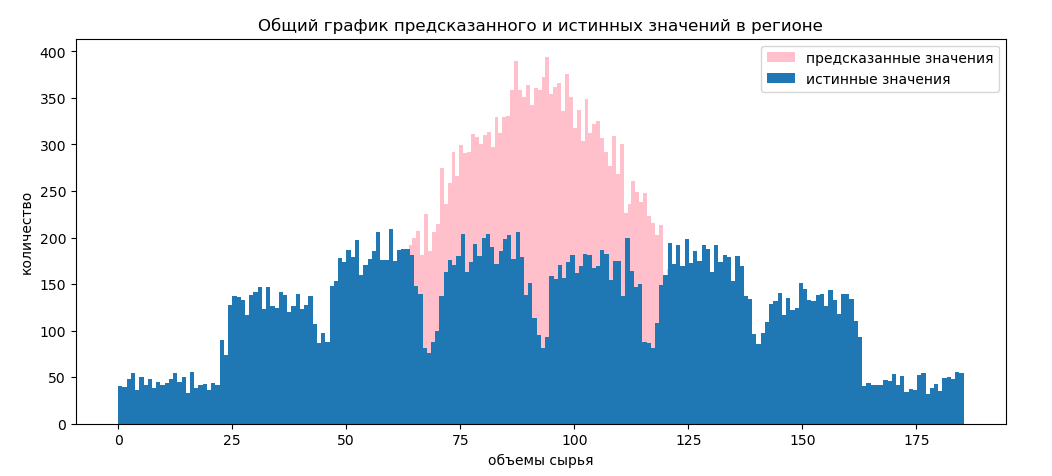

* Для второго региона RMSE модели составило 0.89, средний запас предсказанного сырья 68.61 тыс. баррелей. RMSE кажется хорошей. График разницы предсказанного и истинных значений:

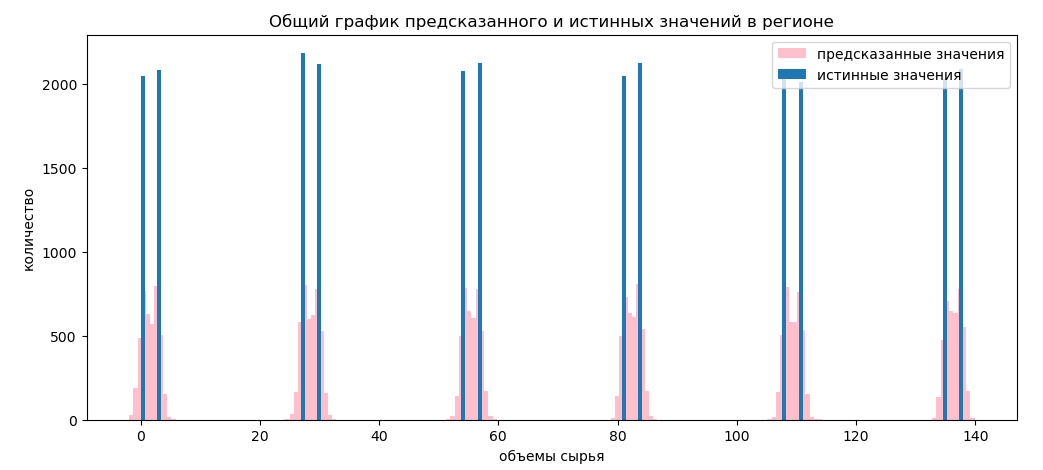

    Есть небольшое ощущение что модель переобучилась, и поэтому выдает такую метрику и результаты.

* Для третьего региона RMSE модели составило 39.94, средний запас предсказанного сырья 95.00 тыс. баррелей. Для третьего региона аналогично первому региону RMSE очень велика. И на графике заметно плохое качество предсказаний:

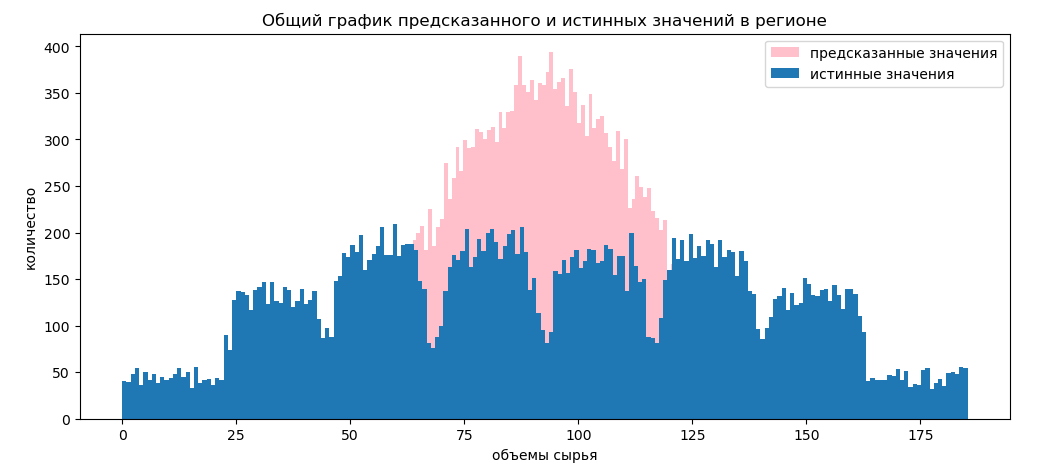
    

<br/>

#### Расчет рисков и прибыли:

* Был рассчитан достаточный объём сырья для безубыточной разработки новой скважины, он составил 111.11 тыс. баррелей.

    Фактический средний запас же в каждом регионе составляет:

    |Регион  |Запас (тыс. баррелей)|
    |:----:|:----:|
    |Регион 1 |92.50|
    |Регион 2 |68.82|
    |Регион 3 |95.00|

    Напомним что средний запас предсказанного сырья в регионах был следующий:

    |Регион  |Запас (тыс. баррелей)|
    |:----:|:----:|
    |Регион 1 |92.73|
    |Регион 2 |68.61|
    |Регион 3 |95.00|

    Средний запас предсказанного сырья оказывается недалек от истинного.

    Все регионы показывают средний запас ниже, чем нам хотелось бы для безубыточности, но заметно больше вероятность окупить затраты в первом и третьем регионе (так как их средние запасы поближе к целевому 111 тыс баррелей).

    Учитывая еще графики запасов, которые были выше, можно увидеть что значения больше 111тыс баррелей встречаются для скважин во всех регионах, и при определенных обстоятельствах могут быть получены. 
    
* С помощью техники Bootstrap был проведен анализ распределения средней прибыли в регионах и риска убытков (рассматривались по 500 скважин, и из них выбирались 200 лучших по объему сырья)

    |Регион  |Средняя прибыль (млн у.е.)|Доверительный интервал (млн)|Риск убытков (%)|
    |:----:|:----:|:----:|:----:|
    |Регион 1 |441.92|(-77.13, 950.29)|4.8|
    |Регион 2 |446.47|(73.73, 878.16)|1.3|
    |Регион 3 |356.71|(-177.21, 888.42)|9.0|



<br/>

### Вывод и рекомендации:

Только во втором регионе не наблюдается отрицательной прибыли в 95% доверительном интервале и самый низкий процент риска убытков = 1.3%, что говорит нам о безубыточности и окупаемости разработки.

Несмотря на то, что в данном регионе самые низкие объемы сырья, в сравнении с первым и третьим регионами, однако средняя доходность скважин (446 млн) выше чем в остальных регионах.

Исходя из полученных в ходе решения задачи результатов, можно рекомендовать второй регион для разработки.

<br/>
